<h1>SVM on Iris Dataset</h1>

For this problem, we will empirically compare the performance of a binary linear classifier to a SVM. Because the purpose of this problem is to compare the performance of the two classifiers, you can use their im- plementation in sklearn. However, note that (a) you should understand how to implement these classifiers from scratch and (b) you may be evaluated on this later in the course. Consider the iris dataset included in sklearn. For all questions of this problem (except the last question), we will only consider the first 100 entries of the dataset. With the help
of train test split from sklearn.model selection, split the dataset into a training set and a test set. For now, you can do so by setting the argument test size to 0.8 in train test split. To ensure results below are comparable and reproducible, set the random state argument of your train test split calls to 0: this will control the shuffling applied to the data before applying the split.

In [1]:
import linecache
from xml.sax import xmlreader
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import matplotlib.pyplot as plt

1. Implement a binary linear classifier on the first two dimensions (sepal length and width) of the iris dataset and plot its decision boundary

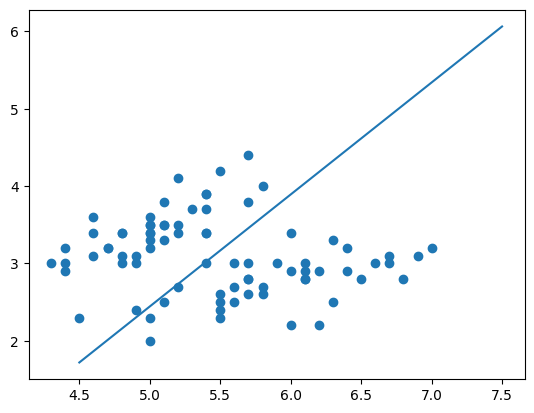

In [2]:
X, Y = load_iris(return_X_y=True)
X_100 = X[:100, :2]
Y_100 = Y[:100]

X_train, X_test, y_train, y_test = train_test_split(X_100, Y_100, test_size=0.8, random_state=0)
clf = LogisticRegression().fit(X_train, y_train)

plt.scatter(X_test[:, 0], X_test[:, 1])

def predict(x, clf):
    m = clf.coef_[0][0] / -clf.coef_[0][1]
    b = clf.intercept_ / -clf.coef_[0][1]
    return  m*x + b

t = np.arange(4.5, 8.5)
line = predict(t, clf)
plt.plot(t, line)
plt.show()

2. Report the accuracy of your binary linear classifier on both the training and test sets

In [3]:
z_train = clf.predict(X_train)
train_accuracy = np.sum(z_train == y_train) / len(y_train)
z_test = clf.predict(X_test)
test_accuracy = np.sum(z_test == y_test) / len(y_test)

print("Train Accuracy: ", train_accuracy) # 1.0
print("Test Accuracy: ", test_accuracy) # 0.9875

Train Accuracy:  1.0
Test Accuracy:  0.9875


3. Implement a linear SVM classifier on the first two dimensions (sepal length and width). Plot the decision boundary of the classifier and its margins

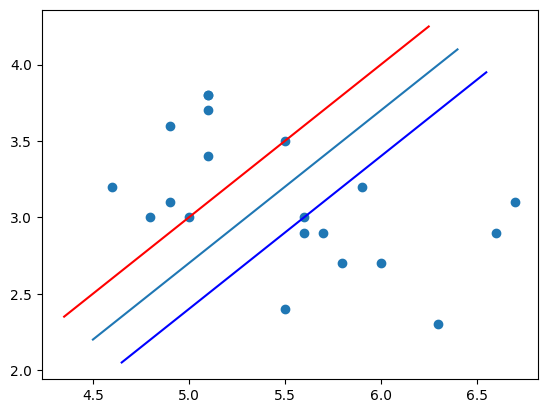

In [4]:
my_svm = svm.SVC(kernel="linear", C=100).fit(X_train, y_train)

t = np.arange(4.5, 6.5, 0.1)
svm_line = predict(t, my_svm)
line_data = np.array([t, svm_line])

margin1 = np.array(line_data.T + (my_svm.coef_) / np.sum(np.square(my_svm.coef_)))
margin2 = np.array(line_data.T - (my_svm.coef_) / np.sum(np.square(my_svm.coef_)))
plt.scatter(X_train[:, 0], X_train[:, 1])
plt.plot(t, line_data[1])
plt.plot(margin1[:, 0], margin1[:, 1], "blue")
plt.plot(margin2[:, 0], margin2[:, 1], "red")
plt.show()

5. Report the accuracy of your linear SVM classifier on both the training and test sets

In [5]:
z_train = my_svm.predict(X_train)
train_accuracy = np.sum(z_train == y_train) / len(y_train)
z_test = my_svm.predict(X_test)
test_accuracy = np.sum(z_test == y_test) / len(y_test)

print("Train Accuracy: ", train_accuracy) # 1.0
print("Test Accuracy: ", test_accuracy) # 1.0

Train Accuracy:  1.0
Test Accuracy:  1.0


6. What is the value of the margin?

In [6]:
print("Decision Boundary: ", 2 * np.linalg.norm(1 / my_svm.coef_)) # 0.8486015315113424

Decision Boundary:  0.8486015315113424


8. Split the iris dataset again in a training and test set, this time setting test size to 0.4 when calling train test split. Train the SVM classifier again. Does the decision boundary change? How about the test accuracy? Please justify why (hint: think about the support vectors), and illustrate your argument with a new plot.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_100, Y_100, test_size=0.8, random_state=0)
my_svm = svm.SVC(kernel="linear", C=100).fit(X_train, y_train)
print("Decision Boundary: ", 2 * np.linalg.norm(1 / my_svm.coef_)) # 0.8486015315113424

z_train = my_svm.predict(X_train)
train_accuracy = np.sum(z_train == y_train) / len(y_train)
z_test = my_svm.predict(X_test)
test_accuracy = np.sum(z_test == y_test) / len(y_test)

print("Train Accuracy: ", train_accuracy) # 1.0
print("Test Accuracy: ", test_accuracy) # 1.0

Decision Boundary:  0.8486015315113424
Train Accuracy:  1.0
Test Accuracy:  1.0


9. Do the binary linear classifier and SVM have the same decision boundaries?

In [8]:
print("Linear Decision Boundary: ", clf.coef_, clf.intercept_) # [[ 1.80226162 -1.24492959]] [-5.9685275]
print("SVM Decision Boundary: ", my_svm.coef_, my_svm.intercept_) # [[ 3.33266363 -3.33342658]] [-7.66277845]

Linear Decision Boundary:  [[ 1.80226162 -1.24492959]] [-5.9685275]
SVM Decision Boundary:  [[ 3.33266363 -3.33342658]] [-7.66277845]


10. Now consider all 150 entries in the iris dataset, and retrain the SVM. You should find that the data points are not linearly separable. How can you deal with it?

In [9]:
# use a polynnomial kernel as follows:
my_svm = svm.SVC(kernel="poly", C=100).fit(X, Y)